In [1]:
from google_play_scraper import app
from app_store_scraper import AppStore
import os
import pandas as pd
import numpy as np
import sys
import importlib
import json
import time
import scrapper
import sentimentAnalysis

#Scrap data:
#TODO: I am experiencing some strange errors when trying to scrap the data - timeouts??
# Increased sleep value seems to make it better + VPN switching

In [2]:
# Suomi 112
import scrapper
importlib.reload(scrapper)
oneonetwo_google = scrapper.google_scrapp(app_id = 'fi.digia.suomi112',country='fi',language='fi',amount=1000)
oneonetwo_google = oneonetwo_google.append(scrapper.google_scrapp(app_id = 'fi.digia.suomi112',country='fi',language='en',amount=1000))
oneonetwo_apple  = scrapper.apple_scrapp( app_id = '998281396',country='fi', app_name='112 Suomi', how_many=1000)


C:\Users\yanns\AppData\Local\Temp\ipykernel_6568\1516094038.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oneonetwo_google = oneonetwo_google.append(scrapper.google_scrapp(app_id = 'fi.digia.suomi112',country='fi',language='en',amount=1000))
2022-10-30 20:17:58,701 [INFO] Base - Initialised: AppStore('fi', '112-suomi', 998281396)
2022-10-30 20:17:58,701 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/fi/app/112-suomi/id998281396
2022-10-30 20:18:02,024 [INFO] Base - [id:998281396] Fetched 172 reviews (172 fetched in total)


In [3]:
oneonetwo = pd.concat([oneonetwo_apple, oneonetwo_google])
oneonetwo.sort_values(['at'], inplace=True, ignore_index=True)
oneonetwo.to_csv("data"+os.sep+"part"+os.sep+"Suomi112_org.csv", encoding='utf-8-sig')

In [4]:
oneonetwo = pd.read_csv("data"+os.sep+"part"+os.sep+"Suomi112_org.csv", encoding='utf-8-sig')

# TODO: Clean CODE

In [5]:
# Sos Live
import scrapper
importlib.reload(scrapper)
sos_live_google = scrapper.google_scrapp(app_id = 'se.sos.soslive',country='se',language='se',amount=1000)
sos_live_apple  = scrapper.apple_scrapp( app_id = '1458725539',country='se', app_name='SOS Alarm', how_many=1000)


2022-10-30 20:18:42,587 [INFO] Base - Initialised: AppStore('se', 'sos-alarm', 1458725539)
2022-10-30 20:18:42,587 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/se/app/sos-alarm/id1458725539
2022-10-30 20:18:47,681 [INFO] Base - [id:1458725539] Fetched 320 reviews (320 fetched in total)
2022-10-30 20:18:48,022 [INFO] Base - [id:1458725539] Fetched 337 reviews (337 fetched in total)


In [6]:
sos_live = pd.concat([sos_live_apple, sos_live_google])
sos_live.sort_values(['at'], inplace=True, ignore_index=True)

oneonetwo.to_csv("data"+os.sep+"part"+os.sep+"SosLive_org.csv", encoding='utf-8-sig')

Translate the data
# TODO: Are all emoticons are lost during this process?

In [3]:
#Load data if needed:

oneonetwo = pd.read_csv("data"+os.sep+"part"+os.sep+"Suomi112_org.csv", encoding='utf-8-sig')
sos_live = pd.read_csv("data"+os.sep+"part"+os.sep+"SosLive_org.csv", encoding='utf-8-sig')

In [4]:
#Translate the data : - Better do it twice (if there are 2 languages in a sentence)
import scrapper
importlib.reload(scrapper)
trans = scrapper.GoogleTranslator()

oneonetwo= trans.translate(oneonetwo)
print("Translation Done")

Translation Done


In [5]:
sos_live = trans.translate(sos_live)
print("Translation Done")

Translation Done


In [6]:
#Save translated data to the files

oneonetwo.to_csv("data"+os.sep+"part"+os.sep+"Suomi112_eng.csv", encoding='utf-8-sig')
sos_live.to_csv("data"+os.sep+"part"+os.sep+"SosLive_eng.csv", encoding='utf-8-sig')
print("Files Saved")

Files Saved


# TODO: Sentiment Analysis + Graph

In [ ]:
#Need to preprocess the data
# #TODO preprocess using that library ....
#Load data if needed:

oneonetwo = pd.read_csv("data"+os.sep+"part"+os.sep+"Suomi112_eng.csv", encoding='utf-8-sig')
sos_live = pd.read_csv("data"+os.sep+"part"+os.sep+"SosLive_eng.csv", encoding='utf-8-sig')
print("Original Data Loaded")

In [7]:

sentimentAnalysis.compound_score(oneonetwo)
sentimentAnalysis.compound_score(sos_live)

End of analysis
End of analysis


In [8]:

oneonetwo.to_csv("data"+os.sep+"part"+os.sep+"Suomi112_cpd.csv", encoding='utf-8-sig')
sos_live.to_csv("data"+os.sep+"part"+os.sep+"SosLive_cpd.csv", encoding='utf-8-sig')
print("Done")

Done


In [2]:
oneonetwo = pd.read_csv("data"+os.sep+"part"+os.sep+"Suomi112_cpd.csv", encoding='utf-8-sig')
sos_live = pd.read_csv("data"+os.sep+"part"+os.sep+"SosLive_cpd.csv", encoding='utf-8-sig')

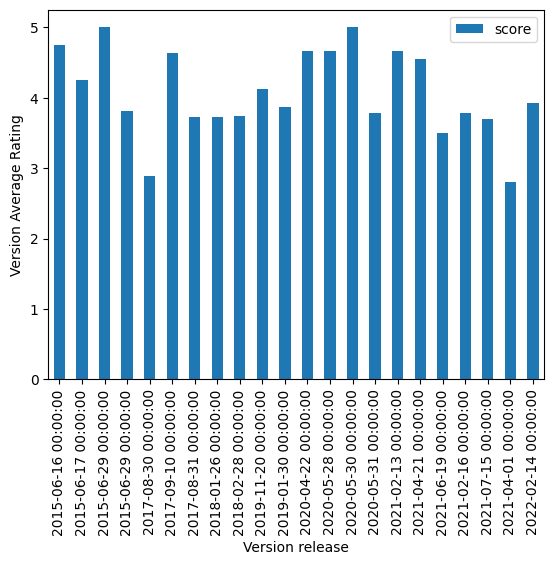

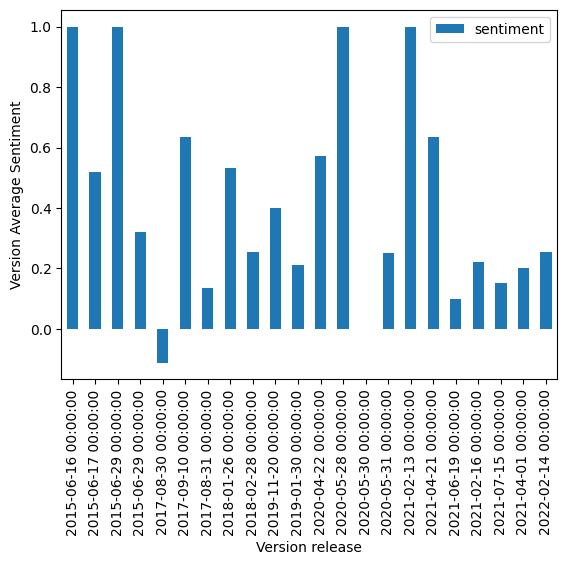

In [3]:
sentimentAnalysis.rating_graph(oneonetwo)
sentimentAnalysis.sentiment_graph(oneonetwo)